Sentence-Bert: Sentence Embeddings using Siamese BERT-Networks.ipynb

# BERT as Sentence Embedding

In [106]:
from sentence_transformers import SentenceTransformer, LoggingHandler
import numpy as np
import logging
import os

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

#plotting
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
from matplotlib import cm
import matplotlib.colors as mcolors

from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error


## Set-up and Load Model

1. pip install -U sentence-transformers
2. git clone https://github.com/UKPLab/sentence-transformers.git
3. pip install -e .

In [2]:
#### Just some code to print debug information to stdout
np.set_printoptions(threshold=100)

logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])
#### /print debug information to stdout


In [3]:
# Load Sentence model (based on BERT) from URL
model = SentenceTransformer('bert-base-nli-mean-tokens')

2020-04-09 23:07:59 - Load pretrained SentenceTransformer: bert-base-nli-mean-tokens
2020-04-09 23:07:59 - Did not find a '/' or '\' in the name. Assume to download model from server.
2020-04-09 23:07:59 - Downloading sentence transformer model from https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/bert-base-nli-mean-tokens.zip and saving it at /home/sevi/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip


100%|██████████| 405M/405M [00:18<00:00, 21.5MB/s] 


2020-04-09 23:08:22 - Load SentenceTransformer from folder: /home/sevi/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip
2020-04-09 23:08:22 - loading configuration file /home/sevi/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip/0_BERT/config.json
2020-04-09 23:08:22 - Model config {
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2020-04-09 23:08:24 - Model name '/home/sevi/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip/0_BERT' not found in model shortcut name list (bert-base-uncased, bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased, bert-base-multilingual-cased, bert-base-chinese, bert-base-german-cased, bert-large-uncased-whole-word-masking, bert-large-cased-whole-word-masking, bert-large-uncased-whole-word-masking-finetuned-squad, bert-large-cased-whole-word-masking-finetuned-squad, bert-base-cased-finetuned-mrpc, bert-base-german-dbmdz-cased, bert-base-german-dbmdz-uncased, bert-base-finnish-cased-v1, bert-base-finnish-uncased-v1). Assuming '/home/sevi/.cache/torch/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip/0_BERT' is a path or url to a directory containing tokenizer files.
2020-04-09 23:08:24 - Didn'

Batches: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

Sentence: This framework generates embeddings for each input sentence
Embedding: [-0.10409471  0.52747655  1.1797731  ... -0.43389118 -0.6945235
  0.53869253]

Sentence: Sentences are passed as a list of string.
Embedding: [-0.13118424 -0.17390288  1.105219   ...  0.02624452 -0.00269884
  0.91611046]

Sentence: The quick brown fox jumps over the lazy dog.
Embedding: [-0.74899274  0.7189173  -1.0394564  ...  0.15582675  1.0202512
  0.09790435]



## Loading and Cleaning Testdata

In [9]:
path = '/home/sevi/Desktop/Work/PropulsionDS/GroupChallenges/RelevApp/10_cleaning/src'

current_path = os.getcwd()
os.chdir(path)
%run ./Load+Clean_News.ipynb
os.chdir(current_path)

/home/sevi/anaconda3/envs/propulsion2020/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
[nltk_data] Downloading package stopwords to /home/sevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
news

,SimilarityScore,sentence1,sentence2
0,4.000,last year wanted murder,last year sought murder
1,5.000,promarket economists dont object corporations blatantly use snob appeal promote products,economists companies openly using attractiveness luxury promote products
2,5.000,perhaps importantly ahmadinejad destabilizing influence bernanke,perhaps important ahmadinejad destabilising influence bernanke
3,4.667,europe,europe
4,4.500,gays modern practices rejected selfindulgent,gay practical modern rejected laws
...,...,...,...
649,1.800,indian pakistani governments nearly engaged fourth conflict 1999,indian pakistani governments conducted nuclear tests may 1998
650,3.800,iguaran stated detainees accused homicide criminal collaboration kidnappings funding terrorism,iguaran stated detainees also involved murders police members antikidnapping group
651,2.400,3 suspected extremists released bail,1 suspected extremist provisionally released without bail
652,0.800,6 czech hospital employees charged human organ trafficking,accused charged international drug trafficking


In [12]:
sent_all = news['sentence1']
sent_all = sent_all.append(news['sentence2'])
#sent_all.drop_duplicates(inplace = True)
sent_all = np.array(sent_all)

## Calculate Embedding

In [13]:
sent_all

array(['last year wanted murder',
       'promarket economists dont object corporations blatantly use snob appeal promote products',
       'perhaps importantly ahmadinejad destabilizing influence bernanke',
       ..., '1 suspected extremist provisionally released without bail',
       'accused charged international drug trafficking',
       'north korea act aggravate situation'], dtype=object)

In [15]:
sentence_embeddings = model.encode(sent_all)

Batches: 100%|██████████| 164/164 [00:35<00:00,  4.68it/s]


In [16]:
print(len(sentence_embeddings))
print(len(sentence_embeddings[0]))

1308
768


## Evaluate Embedding Quality

### Define functions

In [31]:
def most_similar_sent(sent = '', n = 10, embedding_matrix = None, sent_all = None):
    idxes = np.where(sent_all == sent)[0]
    search_vector = embedding_matrix[idxes[0]]
    #search_vector = model.encode(sent_all)[0] 
    
    #calculate cosine similarity
    cos_sim = cosine_similarity([search_vector], embedding_matrix)

    most_similar_idxes = cos_sim[0].argsort()[::-1]
    #exclude the sentence index where the sentence is identical to the input
    most_similar_idxes = most_similar_idxes[~(np.isin(most_similar_idxes, idxes))]
    
    return sent_all[most_similar_idxes[0:n]]   

In [32]:
def get_similarity_index(sent1 = '', sent2 = '', embedding_matrix = None, sent_all = None):
    '''
    This function returns the index n such that the n-th closest sentence to sentence sent1 is sentence sent2.
    '''
    #sent1
    idxes1 = np.where(sent_all == sent1)[0]
    sent1_vector = embedding_matrix[idxes1[0]]

    #sent2
    idxes2 = np.where(sent_all == sent2)[0]
    sent2_vector = embedding_matrix[idxes2[0]]
    
    #calculate cosine similarity
    cos_sim = cosine_similarity([sent1_vector], embedding_matrix)

    most_similar_idxes = cos_sim[0].argsort()[::-1]
    #exclude the sentence index where the sentence is identical to the input
    most_similar_idxes = most_similar_idxes[~(np.isin(most_similar_idxes, idxes1))]
    
    for i in range(len(most_similar_idxes)):
        i_th_sentence = sent_all[most_similar_idxes[i]]
        if(i_th_sentence == sent2):
            return i + 1

    return np.inf


In [33]:
most_similar_sent(sent = 'last year wanted murder', n=10, embedding_matrix=sentence_embeddings, sent_all=sent_all)

array(['last year sought murder ', 'last year sought murder',
       'last year required murder',
       'iguaran stated detainees also involved murders police members antikidnapping group',
       'drug traffickers face death penalty tajik law ',
       'capital offences iran include murder rape armed robbery serious drug trafficking adultery',
       'capital offenses iran include murder rape armed robbery serious drug trafficking adultery',
       'iguaran stated detainees accused homicide criminal collaboration kidnappings funding terrorism ',
       'iguaran stated detainees accused homicide criminal collaboration kidnappings funding terrorism',
       '13 kurds turkey arrested near paris suspicion moneylaundering kurdistan workers party pkk '],
      dtype=object)

### Visualize

In [37]:
#calculate for each sentence pair:
news['closest_percentile'] = news.apply(lambda row: get_similarity_index(
                                                                row['sentence1']
                                                                , row['sentence2']
                                                                , embedding_matrix=sentence_embeddings
                                                                , sent_all = sent_all
                                                            )
                                                , axis = 1)

In [39]:
news.head(10)

,SimilarityScore,sentence1,sentence2,closest_percentile
0,4.000,last year wanted murder,last year sought murder,1.0
1,5.000,promarket economists dont object corporations blatantly use snob appeal promote products,economists companies openly using attractiveness luxury promote products,6.0
2,5.000,perhaps importantly ahmadinejad destabilizing influence bernanke,perhaps important ahmadinejad destabilising influence bernanke,5.0
3,4.667,europe,europe,inf
4,4.500,gays modern practices rejected selfindulgent,gay practical modern rejected laws,5.0
5,5.000,month ago mubarak dismissed demands constitutional reform futile,month muybarak refused demands constitutional reform taxing futile,4.0
6,4.500,month ago mubarak dismissed demands constitutional reform futile,one month muybarak disrupted demands constitutional reform taxing futile,6.0
7,5.000,iraqs future depends directly fate iraqi oil production,future iraq linked oil production country,3.0
8,4.000,todays great pax europa todays paneuropean prosperity depend,large pax europa today like current prosperity paneuropéenne depends,3.0
9,4.500,tendency extends deeper headscarves,trend goes well beyond simple headscarves,1.0


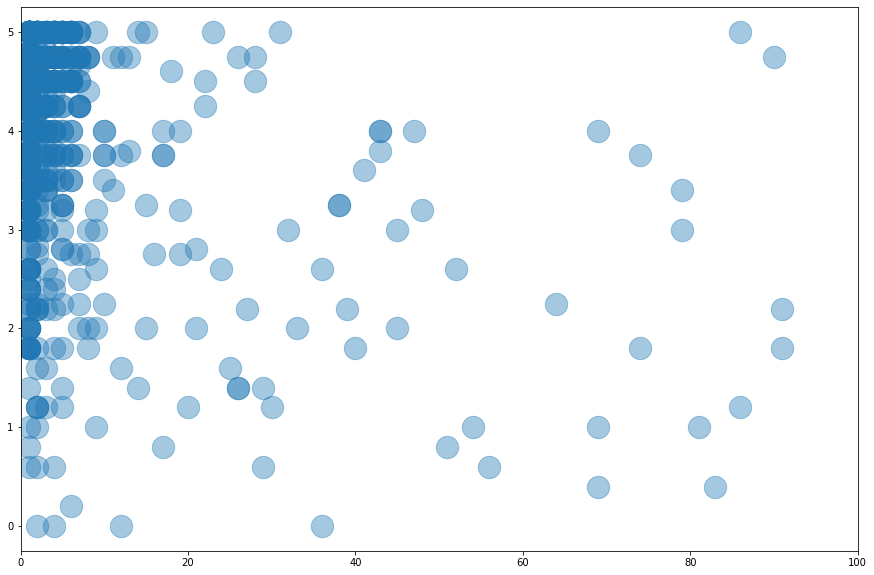

In [45]:
fig = plt.figure(figsize=(15,10))
plt.xlim(0,100)
plt.scatter(news['closest_percentile'] ,news['SimilarityScore'], alpha = 0.4, s = 500)


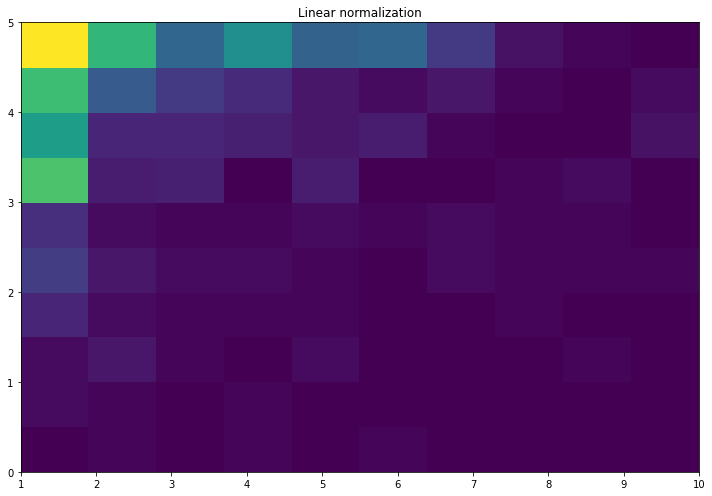

In [51]:
histo_data = news[news['closest_percentile'] >= 0.995]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,7))
ax.set_title('Linear normalization')
ax.hist2d(histo_data['closest_percentile'], histo_data['SimilarityScore'], bins=10, range=[[1,10],[0,5]])
fig.tight_layout()
plt.show()

### Linear Regression

In [52]:
path = '/home/sevi/Desktop/Work/PropulsionDS/GroupChallenges/RelevApp/10_cleaning/src'

current_path = os.getcwd()
os.chdir(path)
%run ./cont_to_cat_News.ipynb
os.chdir(current_path)

In [54]:
news.head(5)

,sim,SimilarityScore,sentence1,sentence2,closest_percentile
0,1,4.000,last year wanted murder,last year sought murder,1.0
1,1,5.000,promarket economists dont object corporations blatantly use snob appeal promote products,economists companies openly using attractiveness luxury promote products,6.0
2,1,5.000,perhaps importantly ahmadinejad destabilizing influence bernanke,perhaps important ahmadinejad destabilising influence bernanke,5.0
3,1,4.667,europe,europe,inf
4,1,4.500,gays modern practices rejected selfindulgent,gay practical modern rejected laws,5.0


In [58]:
data = news

In [65]:
#Calculate embeddings for both rows
data['sentence1_embedding'] = model.encode(data['sentence1'])
data['sentence2_embedding'] = model.encode(data['sentence2'])



Batches:   0%|          | 0/82 [00:00<?, ?it/s]

Batches:   1%|          | 1/82 [00:00<00:13,  6.19it/s]

Batches:   2%|▏         | 2/82 [00:00<00:12,  6.24it/s]

Batches:   4%|▎         | 3/82 [00:00<00:11,  6.73it/s]

Batches:   5%|▍         | 4/82 [00:00<00:10,  7.22it/s]

Batches:   6%|▌         | 5/82 [00:00<00:10,  7.15it/s]

Batches:   7%|▋         | 6/82 [00:00<00:10,  7.35it/s]

Batches:   9%|▊         | 7/82 [00:00<00:10,  7.41it/s]

Batches:  10%|▉         | 8/82 [00:01<00:09,  7.56it/s]

Batches:  11%|█         | 9/82 [00:01<00:10,  7.29it/s]

Batches:  12%|█▏        | 10/82 [00:01<00:10,  6.87it/s]

Batches:  13%|█▎        | 11/82 [00:01<00:10,  6.86it/s]

Batches:  15%|█▍        | 12/82 [00:01<00:10,  6.66it/s]

Batches:  16%|█▌        | 13/82 [00:01<00:10,  6.55it/s]

Batches:  17%|█▋        | 14/82 [00:02<00:10,  6.29it/s]

Batches:  18%|█▊        | 15/82 [00:02<00:11,  5.59it/s]

Batches:  20%|█▉        | 16/82 [00:02<00:12,  5.38it/s]

Batches:  21%|██        | 17/8

In [69]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)
data.head(5)

,sim,SimilarityScore,sentence1,sentence2,closest_percentile,sentence1_embedding,sentence2_embedding
0,1,4.000,last year wanted murder,last year sought murder,1.0,"[0.35028353, -0.45583418, 0.41386345, 0.38353798, -0.29094374, 0.81846786, 0.8184753, 0.6588773,...","[0.44579014, -0.4406712, 0.7449785, 0.4100432, -0.009865566, 0.9934781, 0.52583355, 0.50031143, ..."
1,1,5.000,promarket economists dont object corporations blatantly use snob appeal promote products,economists companies openly using attractiveness luxury promote products,6.0,"[0.5537095, 1.5962262, 0.39140522, -0.17889182, -0.29129115, 0.045326144, 0.52388245, 0.62112504...","[-0.48984706, 1.294888, 0.6780317, -0.13852943, 0.10312036, -1.2164831, -0.47130984, 0.35537165,..."
2,1,5.000,perhaps importantly ahmadinejad destabilizing influence bernanke,perhaps important ahmadinejad destabilising influence bernanke,5.0,"[-0.20272073, 0.49102542, 0.8998413, -0.015703937, -0.22206955, -0.2973318, 0.9234523, 0.0595569...","[-0.29308975, 0.48659527, 0.9548939, -0.046234395, -0.02499563, -0.3177867, 0.8580477, -0.172980..."
3,1,4.667,europe,europe,inf,"[-0.6727266, -1.0389138, 1.7565912, -0.12669116, 0.48817322, -0.5502783, -0.044808522, 0.7690312...","[-0.6727267, -1.0389142, 1.7565914, -0.12669103, 0.4881734, -0.55027807, -0.04480797, 0.7690311,..."
4,1,4.500,gays modern practices rejected selfindulgent,gay practical modern rejected laws,5.0,"[0.3600976, 1.0678558, 0.78159213, -0.0372181, -0.5929897, 0.11425247, 1.5916982, 0.29852155, 0....","[0.18000522, 1.0629598, 0.3812701, -0.2061219, -0.4864451, 0.036259603, 1.6423517, -0.08776021, ..."


In [70]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = \
train_test_split(data['sentence1_embedding'], data['sentence2_embedding'], data['sim'], 
                 test_size=0.2, random_state=42)

In [82]:
X1_train

321    [-0.225697, -0.22455719, 1.1194131, 0.70905393, -0.44699, -0.40666398, 0.70988107, -0.070302784,...
456    [0.5220049, 0.8299052, -0.82398635, -0.030491898, -0.19907148, -0.54987663, 0.35485312, -0.02343...
340    [-0.3259938, -0.04406373, 0.20089331, -0.015503709, 0.38440305, -0.6152333, -0.15247332, -0.3258...
29     [0.3773137, -0.17123966, 1.3142481, 0.34398505, 0.032038648, -0.48352706, 0.21912926, -0.4501452...
570    [0.32701415, 1.0615628, -0.43739966, 0.109363414, 0.16562276, -0.78889734, -0.20996746, 0.814011...
                                                      ...                                                 
71     [-0.6727266, -1.0389138, 1.7565912, -0.12669116, 0.48817322, -0.5502783, -0.044808522, 0.7690312...
106    [0.08575074, -0.0062824404, 0.8777986, -0.014819921, 0.6933354, -0.42501378, 0.39854217, 0.07903...
270    [-0.11838893, -0.00943612, 1.0714682, 0.5048682, 0.6570056, 0.22654144, -0.4092637, -0.56642413,...
435    [-1.1730747, -0.602303, 0.6300

In [87]:
X2_train

321    [-0.42449388, 0.04378803, 1.2464, 0.78530043, -0.24210332, 0.024469849, 0.82400805, -0.3301594, ...
456    [0.4922046, 1.171603, -0.21909174, 0.30079645, -0.25993678, -0.838494, 1.0661281, -0.0670507, 0....
340    [-0.5767101, -0.16329221, 0.19986352, -0.12656099, 0.12196184, -0.44782865, -0.2759164, -0.45370...
29     [0.1165613, -0.007925191, 1.0684216, 0.28256032, 0.20351876, -0.4832574, 0.37012225, -0.43814796...
570    [0.3212316, 1.0312617, 0.013625888, 0.22731008, 0.4529888, -0.37720332, -1.0047604, -0.19957292,...
                                                      ...                                                 
71     [-0.6727267, -1.0389142, 1.7565914, -0.12669103, 0.4881734, -0.55027807, -0.04480797, 0.7690311,...
106    [-0.17987855, -0.3727365, 1.2085819, -0.038498584, 0.87727654, -0.82084244, 0.62726396, -0.37392...
270    [-0.41341752, -0.06256969, 0.9965982, 0.56327766, 0.31359148, 0.39578152, -0.2663297, -0.5411053...
435    [-0.36548877, -1.0064481, 0.40

In [98]:
cs_train = []
for i in range(len(X1_train)):
    cs_temp = cosine_similarity(np.array([X1_train.iloc[i]]), np.array([X2_train.iloc[i]]))
    cs_temp = cs_temp[0][0]
    cs_train.append(cs_temp)
cs_train = np.array(cs_train)   

In [100]:
cs_test = []
for i in range(len(X1_test)):
    cs_temp = cosine_similarity(np.array([X1_test.iloc[i]]), np.array([X2_test.iloc[i]]))
    cs_temp = cs_temp[0][0]
    cs_test.append(cs_temp)
cs_test = np.array(cs_test)   

In [107]:
logit = LogisticRegression(class_weight = 'balanced')
clf = logit.fit(X = cs_train.reshape(-1, 1), y = y_train)
y_pred = clf.predict(cs_test.reshape(-1, 1))
mse_baseline = mean_squared_error(y_true = y_test, y_pred = y_pred)
mse_baseline

0.1984732824427481

In [108]:
# generate a no skill prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]

In [109]:
# predict probabilities
lr_probs = logit.predict_proba(cs_test.reshape(-1, 1))

In [110]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.917


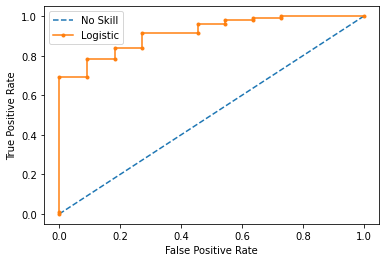

In [111]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()